# **Introduction**

This kernel represents my personal project on the course CS-C3240: Machine Learning at Aalto University. This is also my first end-to-end data science project.  

The project is based on the Kaggle competition "Housing Prices Competition for Kaggle Learn Users". The competition provides a data set of residential homes in Ames, Iowa, U.S. The data set has 79 explanatory variables and the challenge is to predict the final price of each home based on the data available.

Aspiring data scientists at Kaggle have taken different approaches for the challenge. This kernel is an adaption of everything I have come across this far plus my own ideas for the problem at hand. 

### **Import modules**

In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Read in training data**

In [36]:
file_path = 'train.csv'
dataset = pd.read_csv(file_path, index_col=0) # 1st column has row indexes
home_data = dataset.copy()

# **1. Exploratory Data Analysis**

My EDA has 5 main objectives:

1. Build intuition behind the data
2. Detect missing data
3. Detect potential outliers
4. Assess feature correlations
5. Assess normality of the data

## **1.1 Intuition**

In [37]:
home_data.shape

(1460, 80)

The shape tells us the dimensions of the data: the data set has 1460 rows/observations and 80 columns/features. We know that our label is SalePrice, which represents the final sale prices of the houses. That leaves us 79 features that can be used for feature selection/engineering.

Let's take a look at the features:

In [38]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

There appears to quite a lot of interesting variables such as YearBuilt, LotArea, and OverallQual/OverallCond.

The column Dtype tells us that some features are numeric while others are categorical. Perhaps we should take a look at numeric and categorical features distinctively

### **Numerical features**

In [39]:
home_data.select_dtypes(exclude=['object']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [40]:
len(home_data.select_dtypes(exclude=['object']).columns)

37

There are 37 numerical features in the data set. One of the features, SalePrice, is our label.

Let's take a look at the characteristics of the numerical features: 

In [41]:
home_data.select_dtypes(exclude=['object']).describe().round(decimals=2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


### **Categorical features**

In [42]:
home_data.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [43]:
len(home_data.select_dtypes(include=['object']).columns)

43

There are 43 categorical features in the data set with following characteristics:

In [44]:
home_data.select_dtypes(include=['object']).describe().round(decimals=2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## **1.2 Numerical Features**

### **Distribution of the label**

To achieve optimal accuracy, we want the distribution of our label to be as close to a normal distribution as possible when using regression models. Thus, we should assess the distribution of SalePrice:

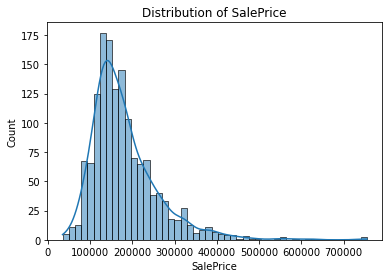

In [45]:
label = home_data['SalePrice']
plt.figure()
sns.histplot(label, kde=True)
plt.title('Distribution of SalePrice')
plt.show()

The data seems positively skewed. Maybe we should take the logarithm?

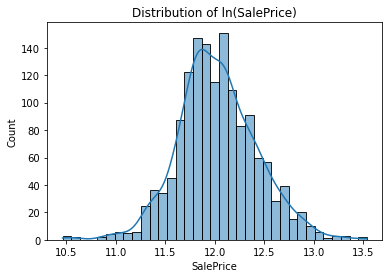

In [46]:
log_label = np.log(label)
plt.figure()
sns.histplot(log_label, kde=True)
plt.title('Distribution of ln(SalePrice)')
plt.show()

The distribution of the natural logarithm of SalePrice is closer to a normal distribution! Thus, we should log-transform the label.

We might want to assess the distributions of the features (or explanatory variables if you want) as well:

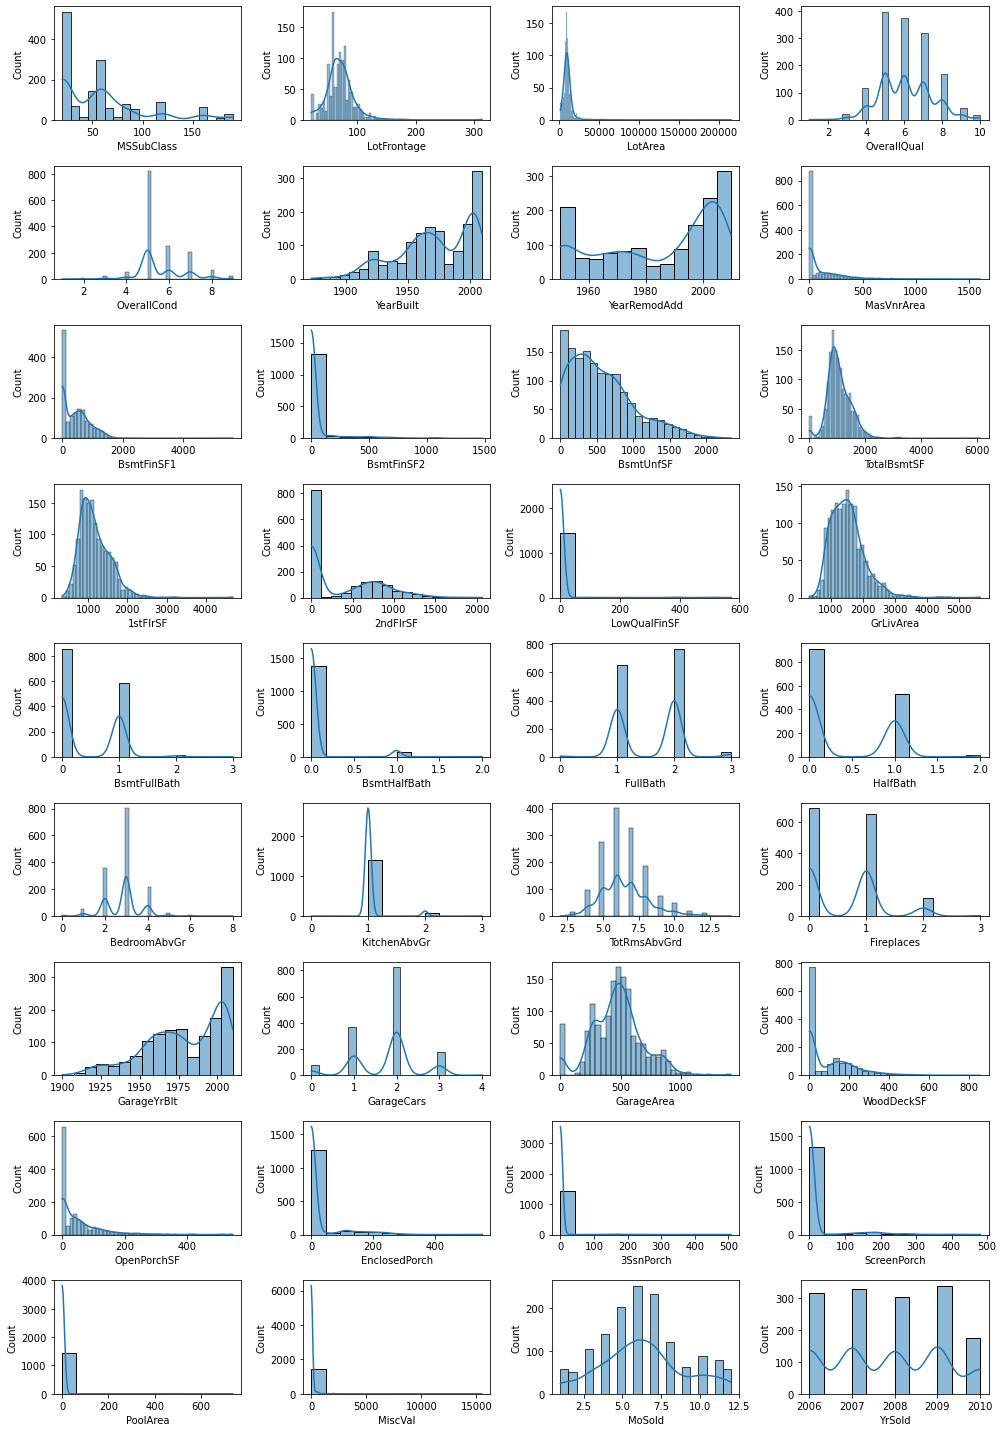

In [47]:
num_features = home_data.select_dtypes(exclude=['object']).drop(columns=['SalePrice']) # label is excluded

fig = plt.figure(figsize=(14,20))
for i in range(len(num_features.columns)):
    fig.add_subplot(9,4,i+1) # dimension of the plot matrix: 9x4 
    sns.histplot(num_features.iloc[:,i].dropna(), kde=True)
    plt.xlabel(num_features.columns[i])

plt.tight_layout()
plt.show()

The plots reveal unimodal skewed distributions, which could potentially be log-transformed to improve accuracy:
- LotFrontage
- LotArea
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- GarageArea
- OpenPorchSF

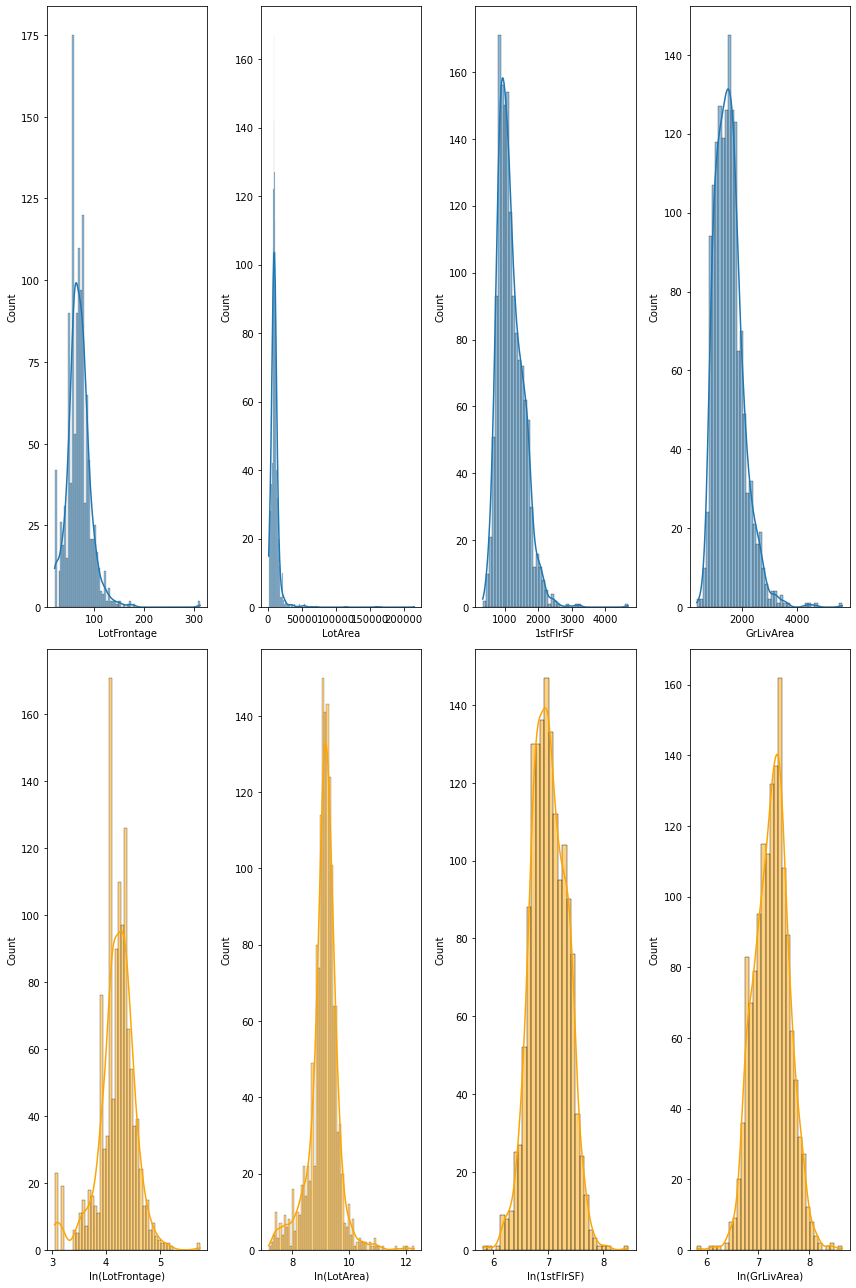

In [48]:
lst = ['LotFrontage','LotArea','1stFlrSF','GrLivArea']
fig = plt.figure(figsize=(12, 18))
for i in range(2*len(lst)):
    fig.add_subplot(2,4,i+1)
    if i < 4:
        sns.histplot(num_features[lst[i]].dropna(), kde=True)
        plt.xlabel(str(lst[i]))
    
    else:
        log_i = np.log(num_features[lst[i-4]])
        sns.histplot(log_i.dropna(), kde=True, color='orange')
        plt.xlabel(str('ln(')+str(lst[i-4])+str(')'))
    
plt.tight_layout()
plt.show()    

The second row shows that the log-transformed features (orange) are somewhat closer to a normal distribution!

### **Outlier detection**

#### **Univariate analysis: Box plots**

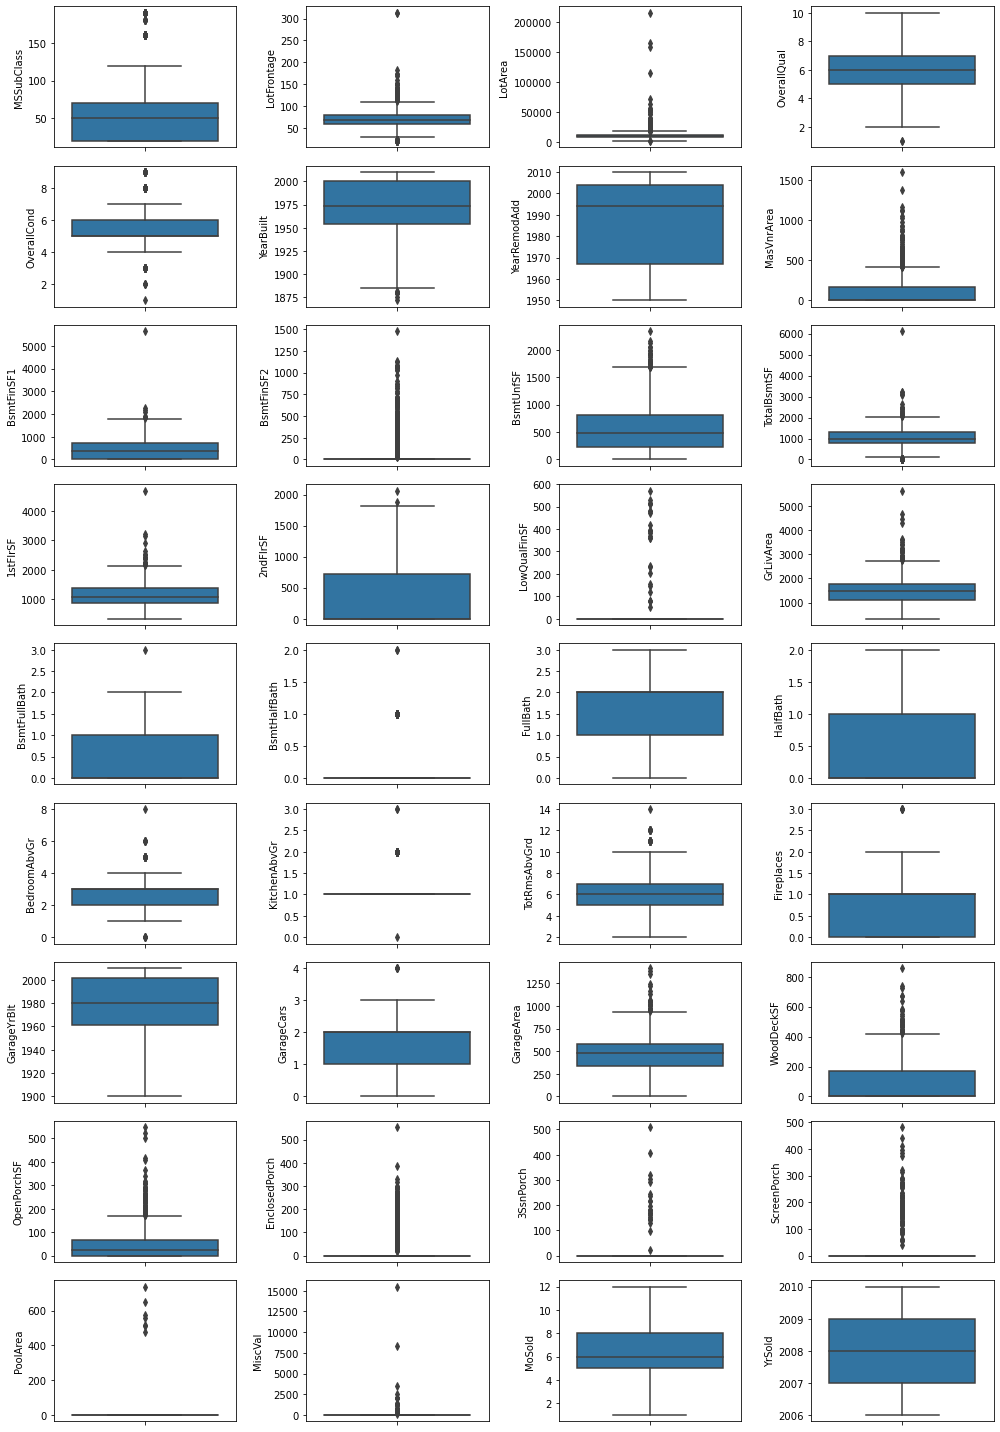

In [49]:
fig = plt.figure(figsize=(14,20))

for i in range(len(num_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=num_features.iloc[:,i].dropna())
    
plt.tight_layout()
plt.show()


Hard to say if there is outliers in the data / whether classifying extreme points as outliers is justified:
- LotFrontage: Linear feet of street connected to property may well be large in a huge property
- Luxury houses may well have several baths (BsmtFullBath) and fireplaces (FirePlaces) that can explain a higher price
- There can well be one hous ein really bad condition (OverallQual) that can explain a very low price

**Maybe bivariate analysis, i.e. scatter plots can help to assess whether there are outliers**

#### **Bivariate analysis: Scatter plots for the label and all features** <a id='scatter'></a>

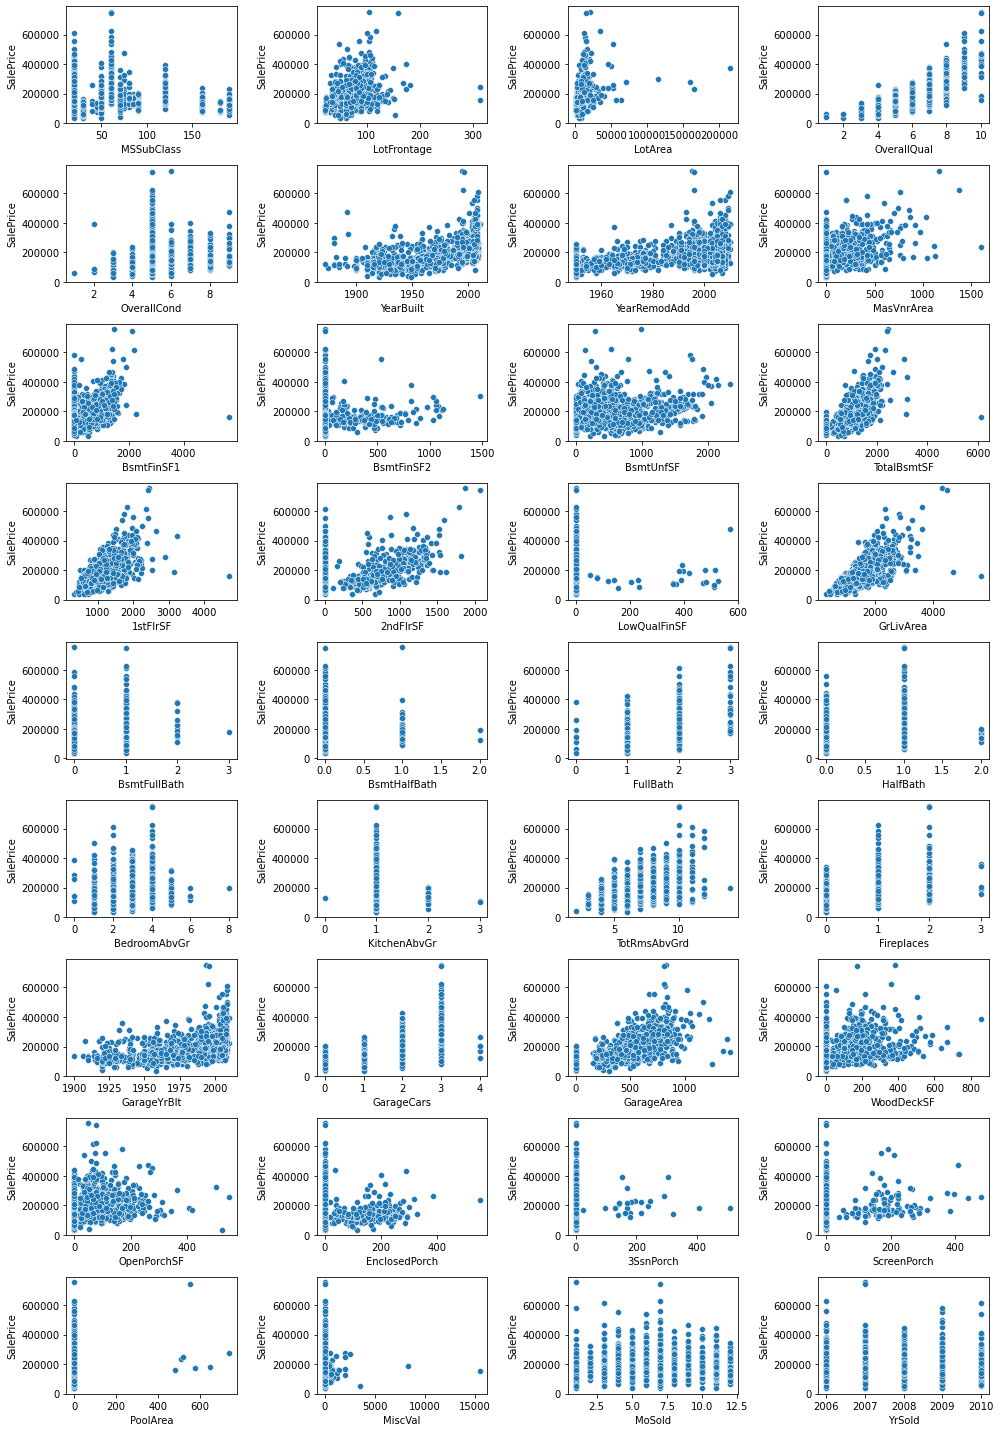

In [50]:
fig = plt.figure(figsize=(14,20))

for i in range(len(num_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.scatterplot(x=num_features.iloc[:,i], y=label)
    
plt.tight_layout()
plt.show()

Based on the scatter plots, there appears to be some potential outliers in the data:

- LotFrontage >300 
- LotArea > 100000
- BsmtFinSF1 > 4000
- GrLivArea > 4000 AND SalePrice < 250000
- PoolArea < 600 AND SalePrice > 600000

#### **Feature correlations** <a id='correlation1'></a>

I will use Pearson correlation to measure the linear relationship between the numerical features in data. This might help to assess which features best predicts our label. Moreover, we can assess which features are correlated. We should not include correlated labels in the features since it intoduces multicollinearity in the regression model. Regarding Pearson correlation, there are a few things that need to be noted :

- Pearson correlation does not reveal non-linear correlation. Thus, we need consider both the correlation and the scatterplots together
- Pearson correlation is sensitive to outliers, which are not yet removed from the data

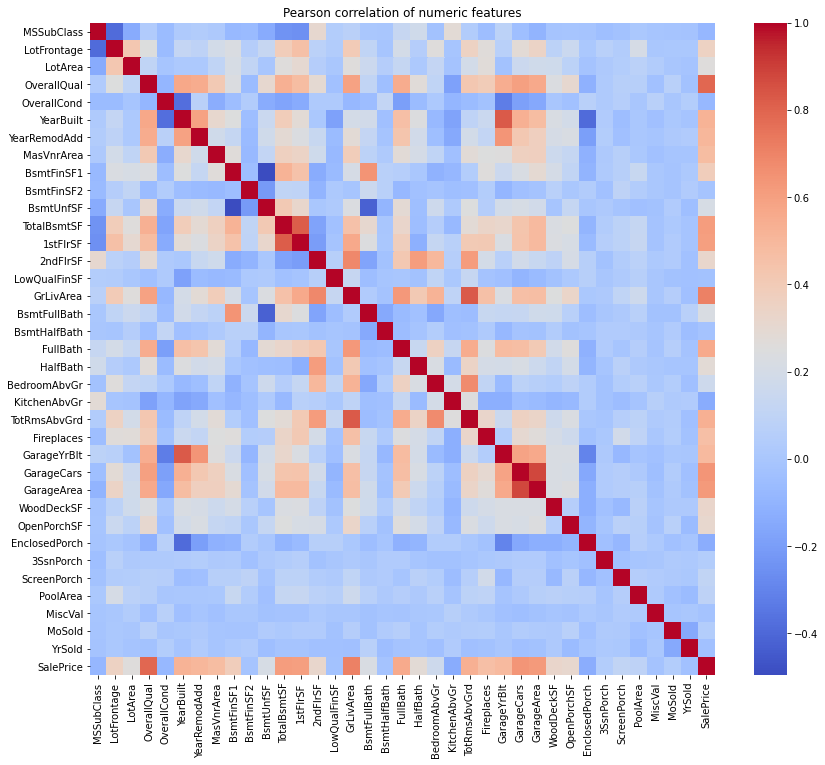

In [51]:
pearson = home_data.corr()

fig, axes = plt.subplots(figsize=(14,12))
sns.heatmap(pearson, cmap='coolwarm')
plt.title('Pearson correlation of numeric features')
plt.show()

From the last of the correlation matrix, we can quite easily assess how the different features correlate with our label, SalePrice. The top 15 correlated features are as follows:  

In [52]:
pearson.SalePrice.sort_values(ascending=False).head(15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

Moreover, we can take a closer look on correlated features:

In [53]:
pearson.unstack().sort_values(ascending=False).drop_duplicates().drop('SalePrice').head(15)

/opt/conda/lib/python3.8/site-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


GarageCars    GarageArea      0.882475
YearBuilt     GarageYrBlt     0.825667
TotRmsAbvGrd  GrLivArea       0.825489
TotalBsmtSF   1stFlrSF        0.819530
2ndFlrSF      GrLivArea       0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFullBath  BsmtFinSF1      0.649212
GarageYrBlt   YearRemodAdd    0.642277
GarageCars    SalePrice       0.640409
FullBath      GrLivArea       0.630012
TotRmsAbvGrd  2ndFlrSF        0.616423
TotalBsmtSF   SalePrice       0.613581
2ndFlrSF      HalfBath        0.609707
OverallQual   GarageCars      0.600671
              GrLivArea       0.593007
dtype: float64

At least the top pairs should be taken into account in feature selection:
- (GarageCars, GarageArea)
- (YearBuilt, GarageYrBlt)
- (TotRmsAbvGrd, GrLivArea)
- (TotalBsmtSF, 1stFlrSF)

Furthermore, we can determine the features that have low correlation with SalePrice and do not exhibit a non-linear relationship either (can be visually confirmed from the scatter plots):

In [54]:
abs(pearson.SalePrice).sort_values().head(15)

BsmtFinSF2       0.011378
BsmtHalfBath     0.016844
MiscVal          0.021190
LowQualFinSF     0.025606
YrSold           0.028923
3SsnPorch        0.044584
MoSold           0.046432
OverallCond      0.077856
MSSubClass       0.084284
PoolArea         0.092404
ScreenPorch      0.111447
EnclosedPorch    0.128578
KitchenAbvGr     0.135907
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
Name: SalePrice, dtype: float64

Such features appear to be at least:
- BsmtFinSF2, MiscVal, LowQualFinSF, YrSold, MoSold, MSSubClass, and BsmtUnfSF 

#### **Missing data in numerical features**

In [55]:
num_features.isna().sum().sort_values(ascending=False).head()

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
YrSold           0
BsmtFinSF2       0
dtype: int64

**Notes**:
- LotFrontage has a lot of missing values. We could potentially impute with median
- GarageYrBlt is highly correlated with YearBuilt so we could just exclude the feature in our model
- MasVnrArea is quite rare in the data set. Thus, we could just replace the NAs with 0 

## **1.3 Categorical Features**

#### **Box plots of SalePrice against categorical features**

In [56]:
cat_features = home_data.select_dtypes(include=['object']).columns
cat_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

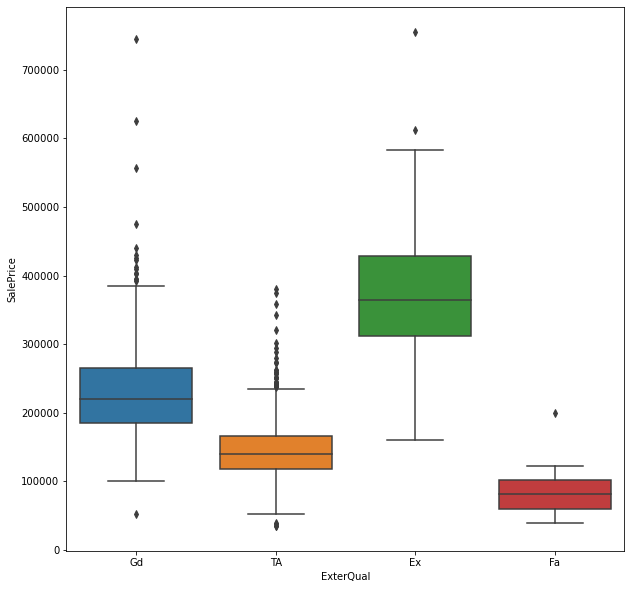

In [57]:
# Relationship between SalePrice and exterior condition of the house
feat = home_data.ExterQual
fig, axes = plt.subplots(figsize=(10,10))
sns.boxplot(y=label, x=feat)
plt.show()

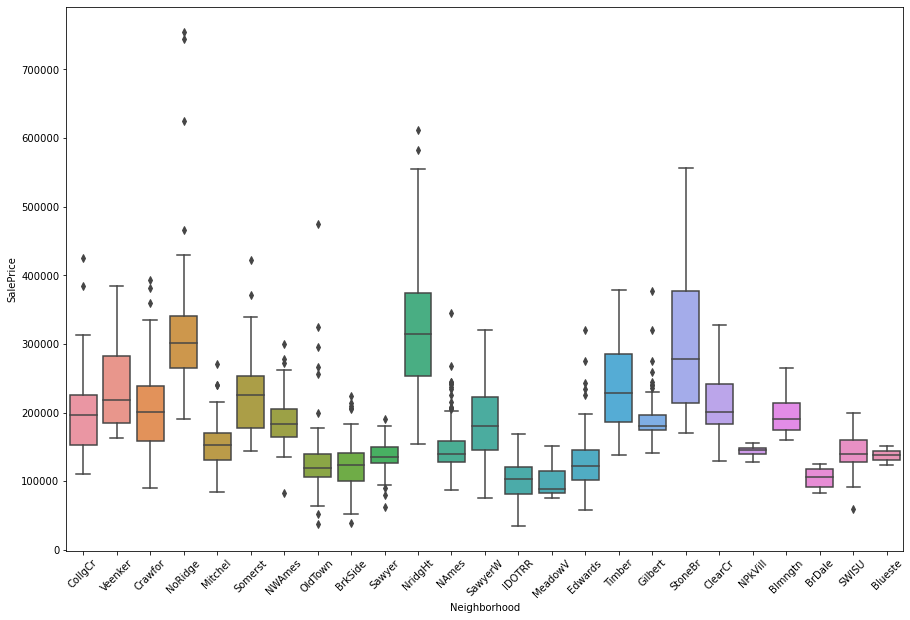

In [58]:
# Relationship between SalePrice and the surrounding neighborhood
feat = home_data.Neighborhood
fig, axes = plt.subplots(figsize=(15,10))
sns.boxplot(y=label, x=feat)
plt.xticks(rotation=45)
plt.show()

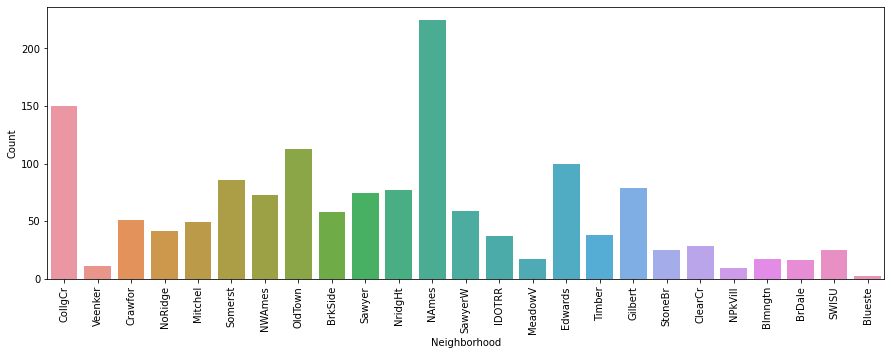

In [59]:
# Number of observations in each neighborhood
fig = plt.figure(figsize=(15,5))
sns.countplot(x='Neighborhood', data=home_data)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

#### **Missing data in categorical features**

In [60]:
home_data[cat_features].isna().sum().sort_values(ascending=False).head(17)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
dtype: int64

**Notes**
- Missing values reflect that the houses do not have those attributes, e.g. a pool, a garage or a basement. Hence, we can impute None
- MasVnrType has same amount of missing values as MasVnrArea (n=8). Same argument here: more likely to not by masonry veneer houses and thus we impute with None

## **2. Data Cleaning and Preprocessing**

#### **Import modules**

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

## **2.1 Missing data**

In [62]:
# Let us create a copy of the original data set for feature engineering
home_data_copy = home_data.copy()

# Numerical features
home_data_copy.MasVnrArea = home_data_copy.MasVnrArea.fillna(0)
imputer = SimpleImputer(missing_values=np.NaN, strategy='median') # Imputer for LotFrontage
home_data_copy.LotFrontage = imputer.fit_transform(home_data_copy.LotFrontage.values.reshape(-1,1)) # NaNs filled with median

# Categorical features
col_names = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageQual',
            'GarageFinish','GarageType','BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtQual',
            'BsmtCond','MasVnrType','Electrical']
for col in col_names:
    home_data_copy[col] = home_data_copy.fillna('None')

In [63]:
home_data_copy.isna().sum().sort_values(ascending=False)

GarageYrBlt     81
Heating          0
RoofStyle        0
RoofMatl         0
Exterior1st      0
                ..
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
MSSubClass       0
Length: 80, dtype: int64

Since GarageYrBlt will be excluded in feature selection, all missing values are now taken care of

## **2.2 Outliers**

In [64]:
# Removal of outliers based on scatter plots of SalePrice against features
home_data_copy = home_data_copy.drop(home_data_copy[home_data_copy.LotFrontage > 300].index)
home_data_copy = home_data_copy.drop(home_data_copy[home_data_copy.LotArea > 100000].index)
home_data_copy = home_data_copy.drop(home_data_copy[home_data_copy.BsmtFinSF1 > 4000].index)
home_data_copy = home_data_copy.drop(home_data_copy[(home_data_copy.GrLivArea > 4000) & 
                                                    (home_data_copy.SalePrice < 250000)].index)
home_data_copy = home_data_copy.drop(home_data_copy[(home_data_copy.PoolArea < 600) & 
                                                    (home_data_copy.SalePrice > 600000)].index)

## **2.3 Log-transformation**

I will log-transform the label SalePrice and the features LotFrontage, LotArea, 1stFlrSF, GrLivArea because the distribution of logs of the variables were closer to a normal distribution 

In [65]:
cols = ['SalePrice','LotFrontage','LotArea','1stFlrSF','GrLivArea']
for col in cols:
    home_data_copy[col] = np.log(home_data_copy[col]) # log-transformation
    home_data_copy = home_data_copy.rename(columns={col: col+'_log'}) # rename to indicate log-transformation

# **3. Feature selection and Engineering**

After log-transformation, piecewise correlations in descending order looks like this:

In [66]:
transf_pearson = home_data_copy.corr()
transf_pearson.unstack().sort_values(ascending=False).drop_duplicates().drop('SalePrice_log').head(15)

/opt/conda/lib/python3.8/site-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


GarageCars       GarageArea       0.886867
YearBuilt        GarageYrBlt      0.824924
GrLivArea_log    TotRmsAbvGrd     0.822147
OverallQual      SalePrice_log    0.819368
1stFlrSF_log     TotalBsmtSF      0.781926
GrLivArea_log    SalePrice_log    0.730120
TotRmsAbvGrd     BedroomAbvGr     0.682554
LotFrontage_log  LotArea_log      0.663900
BsmtFinSF1       BsmtFullBath     0.661034
2ndFlrSF         GrLivArea_log    0.657439
GrLivArea_log    FullBath         0.646014
GarageYrBlt      YearRemodAdd     0.643116
2ndFlrSF         TotRmsAbvGrd     0.614719
                 HalfBath         0.610147
OverallQual      GrLivArea_log    0.601218
dtype: float64

Individual correlations with SalePrice_log looks like this:

In [67]:
transf_pearson.SalePrice_log.sort_values(ascending=False).drop('SalePrice_log').head(20)

OverallQual        0.819368
GrLivArea_log      0.730120
GarageCars         0.680258
GarageArea         0.655120
TotalBsmtSF        0.636436
1stFlrSF_log       0.605604
YearBuilt          0.592396
FullBath           0.588019
YearRemodAdd       0.571938
GarageYrBlt        0.549402
TotRmsAbvGrd       0.529180
Fireplaces         0.481206
MasVnrArea         0.414086
LotArea_log        0.392170
BsmtFinSF1         0.370452
LotFrontage_log    0.336305
WoodDeckSF         0.332037
OpenPorchSF        0.330297
HalfBath           0.313095
2ndFlrSF           0.307548
Name: SalePrice_log, dtype: float64

I will drop the features with lower correlation with SalePrice_log of the pairs that have over 0.8 Pearson correlation. Those variables are:
- GarageArea
- GarageYrBlt
- TotRmsAbvGrd

Moreover, I will drop the features that display low correlation with SalePrice and exhibit no non-linear relationship with the label either. Non-linear relationships were assessed with the [Scatter plots](#scatter)

In [68]:
discarded_feats = ['SalePrice_log','MiscVal','MSSubClass','MoSold','YrSold','GarageArea','GarageYrBlt','TotRmsAbvGrd']

"""
X = home_data_copy[['OverallQual','GrLivArea_log','GarageCars','TotalBsmtSF','YearBuilt','FullBath',
                    'YearRemodAdd','Fireplaces','MasVnrArea','LotArea_log','BsmtFinSF1','LotFrontage_log',
                   'WoodDeckSF','OpenPorchSF','HalfBath','2ndFlrSF']]
"""
X = home_data_copy.drop(columns=discarded_feats) # This messes up the linear regression --> Think why and then you can choose all cols

y = home_data_copy.SalePrice_log # label

X = pd.get_dummies(X) # one-hot coding for the models

# Now, I split 90% of dataset further into a training and validation set
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, test_size = 0.25) # Train-Validation split

# Final imputation of missing data
imputer = SimpleImputer()
train_X = imputer.fit_transform(train_X)
val_X = imputer.transform(val_X)

# **4. Model selection**

## **Import modules**

In [69]:
import sys
!{sys.executable} -m pip install xgboost

In [70]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR 

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor

# Need to fix lm predicting negative values (causes error when doing exp)f

In [71]:
def exp_y(log_y):
    """
    Our label is log(SalePrice). Hence, we must transform it back to obtain SalePrice!
    """
    return np.exp(log_y)

In [72]:
# Create a Series to compare model performance
RMSE_comparison = pd.Series(dtype=float)
RMSE_comparison.index.name = "Model"

# Linear Regression
lm = LinearRegression()
lm.fit(train_X, train_y)
lm_preds = lm.predict(val_X)
# lm_RMSE = MSE(exp_y(lm_preds),exp_y(val_y),squared=False)

# Lasso
lasso = Lasso(alpha=0.001, random_state=1)
lasso.fit(train_X, train_y)
lasso_preds = lasso.predict(val_X)
lasso_RMSE = MSE(exp_y(lasso_preds),exp_y(val_y),squared=False)

# Ridge Regression
ridge = Ridge(alpha=10, random_state=1)
ridge.fit(train_X,train_y)
ridge_preds = ridge.predict(val_X)
ridge_RMSE = MSE(exp_y(ridge_preds),exp_y(val_y),squared=False)

"""
# ElasticNet
en = ElasticNet(alpha=0.005, l1_ratio=0.25, random_state=1)
en.fit(train_X,train_y)
en_preds = en.predict(val_X)
en_RMSE = MSE(exp_y(en_preds),exp_y(val_y),squared=False)

# Random Forest Regression
rf = RandomForestRegressor(random_state=1)
rf.fit(train_X, train_y)
rf_preds = rf.predict(val_X)
rf_RMSE = MSE(exp_y(rf_preds),exp_y(val_y),squared=False)

# Decision Tree Regression
dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(train_X, train_y)
dtr_preds = dtr.predict(val_X)
dtr_RMSE = MSE(exp_y(dtr_preds), exp_y(val_y),squared=False)

# Gradient Boosting Regression
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01,
                               max_depth=3, random_state=1)
gbr.fit(train_X, train_y)
gbr_preds = gbr.predict(val_X)
gbr_RMSE = MSE(exp_y(gbr_preds), exp_y(val_y),squared=False)

# XGBoost
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.05,
                  max_depth=5, random_state=1)
xgb.fit(train_X,train_y, early_stopping_rounds=5,eval_set=[(val_X,val_y)],verbose=False)
xgb_preds = xgb.predict(val_X)
xgb_RMSE = MSE(exp_y(xgb_preds),exp_y(val_y),squared=False)
"""

# Add RMSE results to Series for comparison
# RMSE_comparison['Linear Regression'] = lm_RMSE
RMSE_comparison['Lasso'] = lasso_RMSE
RMSE_comparison['Ridge Regression'] = ridge_RMSE
#RMSE_comparison['Elastic Net Regression'] = en_RMSE
#RMSE_comparison['Random Forest Regression'] = rf_RMSE
#RMSE_comparison['Decision Tree Regressor'] = dtr_RMSE
#RMSE_comparison['Gradient Boosting Regression'] = gbr_RMSE
# RMSE_comparison['XGBoost Regression'] = xgb_RMSE


# Best model is the one with lowest RMSE
print(RMSE_comparison.sort_values(ascending=True))

Model
Lasso               19803.705634
Ridge Regression    19825.687815
dtype: float64


## Training error

In [73]:
train_RMSE_comparison = pd.Series(dtype=float)
train_RMSE_comparison.index.name = "Model"

lasso_RMSE_train = MSE(exp_y(ridge.predict(train_X)),exp_y(train_y),squared=False)
ridge_RMSE_train = MSE(exp_y(lasso.predict(train_X)),exp_y(train_y),squared=False)

train_RMSE_comparison['Lasso'] = lasso_RMSE_train
train_RMSE_comparison['Ridge Regression'] = ridge_RMSE_train

print(train_RMSE_comparison.sort_values(ascending=True))

Model
Lasso               17267.248711
Ridge Regression    18491.509052
dtype: float64


**Problem: Full variable set messes up Linear Regression! Figure out what to do about it**

## **Cross-validation**

In [74]:
from sklearn.model_selection import cross_val_score

In [75]:
imputed_X = imputer.fit_transform(X)

# Table for cross validation results
CV_comparison = pd.Series(dtype=float)
CV_comparison.index.name = "Model"

# List of all models used 
models = {lasso, ridge} #,lm, en, rf, dtr, gbr}

for model in models:
    scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
    CV_comparison['{}'.format(str(model).split('(')[0])]=-np.mean(scores).round(decimals=5) # We want model name without parameters

In [76]:
# Best model is the one with lowest RMSE
CV_comparison.sort_values(ascending=True)

Model
Ridge    0.01202
Lasso    0.01211
dtype: float64

# **5. Model tuning**

In [77]:
from sklearn.model_selection import GridSearchCV

parameter_grid = [{'alpha':[100,50,10,1,0.1,0.01,0.001,0.0001,0]}]
top_model = Ridge()

grid_search = GridSearchCV(top_model, parameter_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X,y)
grid_search.best_params_

{'alpha': 10}

In [78]:
test_data_path = 'test.csv'
test_data = pd.read_csv(test_data_path)

**Next: repeat pre-processing for test data (missing values, dropping columns, log-transforms, etc.)**

## Pre-processing for test data

In [81]:
test_X = test_data.copy()

test_X.isna().sum().sort_values(ascending=False).head(35)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
LandSlope          0
dtype: int64

In [82]:
test_X.MasVnrArea = test_X.MasVnrArea.fillna(0)

for col in col_names:
    test_X[col] = test_X.fillna('None')

if 'SalePrice_log' in discarded_feats:
    discarded_feats.remove('SalePrice_log')

test_X = test_X.drop(discarded_feats, axis=1)
test_X = pd.get_dummies(test_X)

# Align encoding with training data
final_train, final_test = X.align(test_X, join='left', axis=1)

# Impute all other missing values
final_train_imputed = imputer.fit_transform(final_train)
final_test_imputed = imputer.transform(final_test)

## Final model

In [83]:
final_model = Ridge(alpha=10, random_state=1)

# Fit the model using all data
final_model.fit(final_train_imputed, y)

Ridge(alpha=10, random_state=1)

## Predictions

In [111]:
test_preds = final_model.predict(final_test_imputed)

output = pd.DataFrame({'Id': test_data.Id,
                      'SalePrice': exp_y(test_preds)})
output.to_csv('submission_csv', index=False)